# Introduction to Python programming for MPECDT
### [Gerard Gorman](http://www.imperial.ac.uk/people/g.gorman), [Christian Jacobs](http://www.imperial.ac.uk/people/c.jacobs10)
### Modified for MPECDT by [David Ham](http://www.imperial.ac.uk/people/david.ham)

# Lecture 4: Array computing and curve plotting

Learning objectives: 

* Learn how to compute using arrays, *i.e.* vectorise code.
* Learn how to generate 2D graphs.

## Vectors and arrays

You have known **vectors** since high school mathematics, *e.g.*, point $(x,y)$ in the plane, point $(x,y,z)$ in space. In general, we can describe a vector $v$ as an $n$-tuple of numbers: $v=(v_0,\ldots,v_{n-1})$. One way to store vectors in Python is by using *lists*: $v_i$ is stored as *v[i]*.

**Arrays** are a generalization of vectors where we can have multiple indices: $A_{i,j}$, $A_{i,j,k}$. In Python code this is represented as a nested list (see previous lecture), accessed as *A[i][j]*, *A[i][j][k]*.

Example: table of numbers, one index for the row, one for the column
$$
\left\lbrack\begin{array}{cccc}
0 & 12 & -1 & 5q
-1 & -1 & -1 & 0\cr
11 & 5 & 5 & -2
\end{array}\right\rbrack
\hspace{1cm}
A =
\left\lbrack\begin{array}{ccc}
A_{0,0} & \cdots &  A_{0,n-1}\cr
\vdots & \ddots &  \vdots\cr
A_{m-1,0} & \cdots & A_{m-1,n-1}
\end{array}\right\rbrack
$$
The number of indices in an array is the *rank* or *number of dimensions*. Using these terms, a vector can be described as a one-dimensional array, or rank 1 array.

In practice, we use Numerical Python arrays instead of lists to represent mathematical arrays because it is **much** faster for large arrays.

Let's consider an example where we store $(x,y)$ points along a curve in Python lists and *Numerical Python* (*NumPy*) arrays:

In [5]:
# Sample function
def f(x):
    return x**3

# Generate n points in [0,1]
n = 5
dx = 1.0/(n-1) # x spacing

xlist = [i*dx for i in range(n)] # Python lists
ylist = [f(x) for x in xlist]

# Turn these Python lists into Numerical Python (NumPy) arrays:
from numpy import *
x2 = array(xlist)
y2 = array(ylist)

Instead of first making lists with $x$ and $y = f (x)$ data, and then turning lists into arrays, we can make NumPy arrays
directly:

In [2]:
n = 5                     # number of points
x2 = linspace(0, 1, n)    # generates n points between 0 and 1
y2 = zeros(n)             # n zeros (float data type by default)
for i in xrange(n):     
    y2[i] = f(x2[i])

*xrange* is similar to range but faster. Especially for large $n$ (*xrange* does not explicitly build a list of integers, xrange just lets you loop over the values).

List comprehensions create lists, not arrays, but we can do:

In [3]:
y2 = array([f(xi) for xi in x2]) # list -> array

### When and where to use NumPy arrays

* Python lists can hold any sequence of any Python objects, however, NumPy arrays can only hold objects of the same type.
* Arrays are most efficient when the elements are of basic number types (*float*, *int*, *complex*).
* In that case, arrays are stored efficiently in the computer's memory and we can compute very efficiently with the array elements.
* Mathematical operations on whole arrays can be done without loops in Python. For example,

In [4]:
x = linspace(0, 2, 10001)
y = zeros(10001)
for i in xrange(len(x)):
    y[i] = sin(x[i])

can be coded as

In [5]:
y = sin(x)

In the latter case the loop over all elements is now performed in a very efficient C function.

Operations on whole arrays, instead of using Python *for*-loops, is called vectorization and is a very **convenient**, **efficient** and therefore important programming technique to master.

Let's consider a simple vectorisation example: a loop to compute $x$ coordinates (*x2*) and $y=f(x)$ coordinates (*y2*) along a function curve:

In [6]:
x2 = linspace(0, 1, n)
y2 = zeros(n)
for i in xrange(n):
    y2[i] = f(x2[i])

This computation can be replaced by:

In [7]:
x2 = linspace(0, 1, n)
y2 = f(x2)

The advantage of this approach is:

* There is no need to allocate space for y2 (via the NumPy *zeros* function).
* There is no need for a loop.
* It is *much* faster.

##How vectorised functions work
Consider the function

In [8]:
def f(x):
    return x**3

$f(x)$ is intended for a number $x$, *i.e.* a *scalar*. So what happens when we call *f(x2)*, where *x2* is an NumPy array? **The function simply evaluates $x^3$ for an array x**. NumPy supports arithmetic operations on arrays, which correspond to the equivalent operations on each element, *e.g.*:

In [9]:
x**3                # x[i]**3 forr all i
cos(x)              # cos(x[i]) for all i
x**3 + x*cos(x)     # x[i]**3 + x[i]*cos(x[i]) for all i
x/3*exp(-x*0.5)     # x[i]/3*exp(-x[i]*0.5) for all i 

array([  0.00000000e+00,   6.66600003e-05,   1.33306669e-04, ...,
         2.45252956e-01,   2.45252960e-01,   2.45252961e-01])

In each of these cases a highly optimised C function is actually called to evaluate the expression. In this example, the *cos* function called for an *array* is imported from *numpy* rathar than from the *math* module which only acts on scalars.

Notes:

* Functions that can operate on arrays are called **vectorized functions**.
* Vectorization is the process of turning a non-vectorized expression/algorithm into a vectorized expression/algorithm.
* Mathematical functions in Python automatically work for both scalar and array (vector) arguments, *i.e.* no vectorization is needed by the programmer.


###Watch out for references Vs. copies of arrays!
Consider this code:

In [10]:
a=x
a[-1] = 42
print x[-1]

42.0


Notice what happened here - we changed a value in *a* but the corresponding value in *x* was also changed! This is because *a* refers to the same array as *x*. If you really want a seperate copy of *x* then we have to make an explicit copy:

In [11]:
a = x.copy()

## <span style="color:blue">Exercise 1: Fill lists and arrays with function values</span>
A function with many applications in science is defined as:</br></br>
$h(x) = \frac{1}{\sqrt{2\pi}}\exp(-0.5x^2)$</br></br>

* Fill two lists *xlist* and *hlist* with *x* and *h(x)* values for uniformly spaced *x* coordinates in [−4, 4]. You may adapt the first example in the lecture 4 notes.

* Fill two arrays *x* and *y* with *x* and *h(x)* values, respectively, where *h(x)* is defined above. Let the *x* values be uniformly spaced in [−4, 4]. Use list comprehensions to create the *x* and *y* arrays.

* Vectorize the code by creating the *x* values using the *linspace* function and by evaluating *h(x)* for an array argument.

In [2]:
from numpy import *

def h(x):
    return (1./sqrt(2*pi))*exp(-0.5*x**2)

xlist = linspace(-4,4,9)
hlist1 = zeros(9)
c=0
for i in xlist: # Using a for loop
    hlist1[c] = h(i)
    c = c+1
print xlist, hlist1

hlist2 = array([h(xi) for xi in xlist]) # List comprehension

print xlist, hlist2

hlist3 = h(xlist) # Vectorized form

print hlist3

[-4. -3. -2. -1.  0.  1.  2.  3.  4.] [  1.33830226e-04   4.43184841e-03   5.39909665e-02   2.41970725e-01
   3.98942280e-01   2.41970725e-01   5.39909665e-02   4.43184841e-03
   1.33830226e-04]
[-4. -3. -2. -1.  0.  1.  2.  3.  4.] [  1.33830226e-04   4.43184841e-03   5.39909665e-02   2.41970725e-01
   3.98942280e-01   2.41970725e-01   5.39909665e-02   4.43184841e-03
   1.33830226e-04]
[  1.33830226e-04   4.43184841e-03   5.39909665e-02   2.41970725e-01
   3.98942280e-01   2.41970725e-01   5.39909665e-02   4.43184841e-03
   1.33830226e-04]


## <span style="color:blue">Exercise 2: Apply a function to a vector</span>
Given a vector $v = (2, 3, −1)$ and a function $f(x) = x^3 + xe^x + 1$, apply $f$ to each element in $v$. Then calculate $f(v)$ as $v^3 + ve^v + 1$ using vector computing rules. Show that the two results are equal.

In [6]:
from numpy import *

vec = array([2,3,-1])

fv = array([f(xi) for xi in vec])

def f(x):
    return x**3 + x*exp(x) + 1

print fv, f(vec)

[ 8 27 -1] [ 23.7781122   88.25661077  -0.36787944]


## <span style="color:blue">Exercise 3: Simulate by hand a vectorized expression</span>
Suppose *x* and *t* are two arrays of the same length, entering a vectorized expression:

In [7]:
y = cos(sin(x)) + exp(1/t)

NameError: name 't' is not defined

If *x* holds two elements, 0 and 2, and *t* holds the elements 1 and 1.5, calculate by hand (using a calculator) the *y* array. Thereafter, write a program that mimics the series of computations you did by hand (use explicit loops, but at the end you can use NumPy functionality to check the results).

In [15]:
def y(x,t):
    return cos(sin(x)) + exp(1/t)

x = array([0.,2.])
t = array([1.,1.5])

yarray = array([y(a,b) for a in x for b in t])

print yarray

[ 3.71828183  2.94773404  3.33258211  2.56203432]


##Generalised array indexing
We can select a slice of an array using *a[start:stop:inc]*, where the slice *start:stop:inc* implies a set of indices starting from *start*, up to *stop* in increments of *inc*. In fact, any integer list or array can be used to indicate a set of indices:

In [12]:
a = linspace(1, 8, 8)
print a

[ 1.  2.  3.  4.  5.  6.  7.  8.]


In [13]:
a[[1,6,7]] = 10 # i.e. set the elements with indicies 1,6, and 7 in the list to 10.
print a

[  1.  10.   3.   4.   5.   6.  10.  10.]


In [14]:
a[range(2,8,3)] = -2   # same as a[2:8:3] = -2
print a

[  1.  10.  -2.   4.   5.  -2.  10.  10.]


Even boolean expressions can also be used to select part of an array(!)

In [15]:
print a[a < 0] # pick out all negative elements

[-2. -2.]


In [16]:
a[a < 0] = a.max() # if a[i]<0, set a[i]=10
print a

[  1.  10.  10.   4.   5.  10.  10.  10.]


## <span style="color:blue">Exercise 4: Demonstrate array slicing</span>
Create an array *w* with values 0, 0.1, 0.2, ..., 3. Write out *w[:]*, *w[:-2]*, *w[::5]*, *w[2:-2:6]*. Convince yourself in each case that you understand which elements of the array are printed.

In [31]:
n = 31
dx = 1.0/(n-1)

w = [(i*dx)*3 for i in range(n)]

print "%.1f" % w[3]

0.3


## Plotting curves - the basics
First of all, a little house keeping. There are quite a few ways of plotting graphs etc. in Python. Currently the best way is using [PyLab](http://wiki.scipy.org/PyLab). The most important PyLab functions come from the `pyplot` module and are [documented here](http://matplotlib.org/api/pyplot_api.html). Secondly, because we are doing this within IPython NoteBook, and we do not want additional windows popping up all over the place, we execute this next line:

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Now, onwards and upwards...

A curve $y = f(x)$ stored in the 1D NumPy arrays *x* and *y* can easily be plotted:

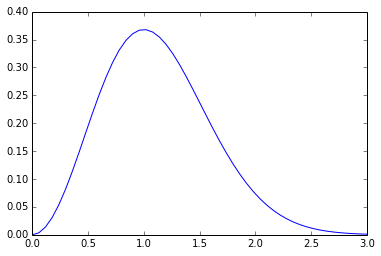

In [70]:
from pylab import *
t = linspace(0, 3, 51)
y = t**2*exp(-t**2)
plot(t, y)
show()

Plots also should have **labels** on the axis, a **title**, and sometimes a specific extent of the axis (perhaps you wish to easily compare two graphs side-by-side):

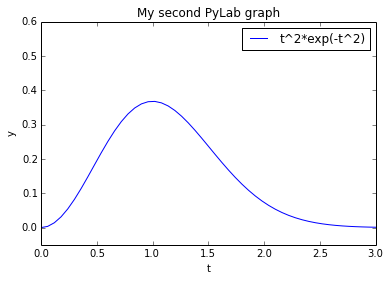

In [69]:
def f(t):
    return t**2*exp(-t**2)

t = linspace(0, 3, 51) # Generates 51 points between 0 and 3
y = f(t)
plot(t, y)

xlabel('t')
ylabel('y')
legend(('t^2*exp(-t^2)',))
axis([0, 3, -0.05, 0.6]) # specify the extent of the axes [tmin, tmax, ymin, ymax]

title('My second PyLab graph')
show()

## <span style="color:blue">Exercise 5: Plot a formula</span>
* Make a plot of the function $y(t) = v_0t − 0.5gt^2$ for $v_0 = 10$, $g = 9.81$, and $t \in [0, 2v_0/g]$. The label on the *x* axis should be 'time (s)' and the label on the *y* axis should be 'height (m)'.
* Extend the program such that the minimum and maximum *x* and *y* values are computed, and use the extreme values to specify the extent of the *x* and *y* axes. Add some space above the heighest curve.

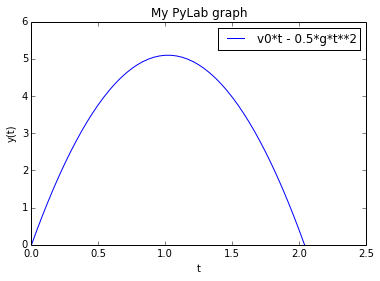

In [5]:
from pylab import *

v0 = 10
g = 9.81

t = linspace(0,2*v0/g)

def y(t):
    return v0*t - 0.5*g*t**2

f = y(t)
plot(t, f)

xlabel('t')
ylabel('y(t)')
legend(('v0*t - 0.5*g*t**2',))

title('My PyLab graph')
show()

## <span style="color:blue">Exercise 6: Plot another formula</span>
The function</br></br>
$f(x, t) = \exp(-(x - 3t)^2)\sin(3\pi(x - t))$
</br></br>
describes, for a fixed value of *t*, a wave localized in space. Make a program that visualizes this function as a function of *x* on the interval [−4, 4] when *t* = 0.

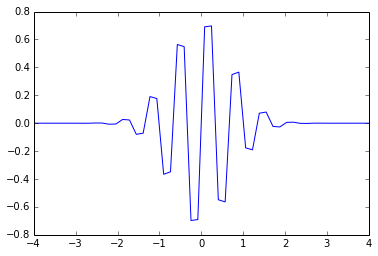

In [72]:
def f(x,t):
    return exp(-(x-3*t)**2)*sin(3*pi*(x-t))

x = linspace(-4,4)
t = 0

y = f(x,t)

plot(x,y)
show()


# Multiple curves in one plot
We can also plot several curves in one plot:

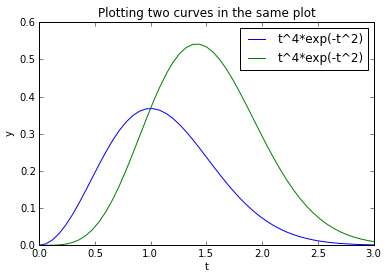

In [20]:
def f1(t):
    return t**2*exp(-t**2)

def f2(t):
    return t**2*f1(t)

t = linspace(0, 3, 51)
y1 = f1(t)
y2 = f2(t)

# Matlab-style syntax:
plots = plot(t, y1, t, y2)
legend(plots, ('t^4*exp(-t^2)', 't^4*exp(-t^2)'), loc='best')
xlabel('t')
ylabel('y')
title('Plotting two curves in the same plot')
show()

When plotting multiple curves in the same plot, PyLab usually does a good job in making sure that the different lines actually look different. However, sometimes you need to take action yourself (*e.g.* if you need to print your graph out in black&white). To do this we can add an extra argument to the plot command where we specify what we want - *e.g.* "r-" means a *red line*, while "bo" means *blue circles*:

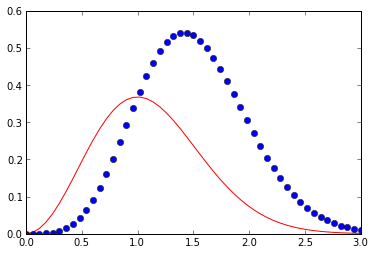

In [21]:
plot(t, y1, 'r-', t, y2, 'bo')
show()

For further examples check out the [PyLab website](http://scipy.org/PyLab).

## <span style="color:blue">Exercise 7: Plot a formula for several parameters</span>
Make a program that reads a set of $v_0$ values using raw_input and plots the corresponding curves $y(t) = v_0t − 0.5gt^2$ in the same figure (set $g = 9.81$). Let $t \in [0, 2v_0/g$] for each curve, which implies that you need a different vector of $t$ coordinates for each curve.

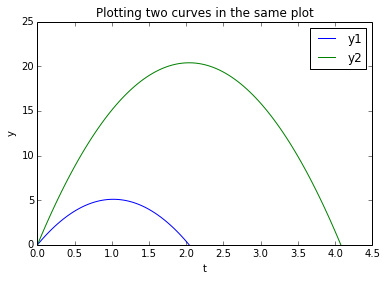

In [16]:
g = 9.81

def y(t,v0):
    return v0*t - 0.5*g*t**2

v01 = 10
v02 = 20

t1 = linspace(0, 2.*v01/g, 101)
t2 = linspace(0, 2.*v02/g, 101)
y1 = y(t1, v01)
y2 = y(t2, v02)

# Matlab-style syntax:
plots = plot(t1, y1, t2, y2)
legend(plots, ('y1', 'y2'), loc='best')
xlabel('t')
ylabel('y')
title('Plotting two curves in the same plot')
show()

##2D arrays
When we have a table of numbers,

$$
\left\lbrack\begin{array}{cccc}
0 & 12 & -1 & 5\cr
-1 & -1 & -1 & 0\cr
11 & 5 & 5 & -2
\end{array}\right\rbrack
$$

(*i.e.* a *matrix*) it is natural to use a two-dimensional array $A_{i,j}$ with one index for the rows and one for the columns:

$$
A = 
\left\lbrack\begin{array}{ccc}
A_{0,0} & \cdots &  A_{0,n-1}\cr
\vdots & \ddots &  \vdots\cr
A_{m-1,0} & \cdots & A_{m-1,n-1}
\end{array}\right\rbrack
$$

Let's recreate this array using NumPy:

In [22]:
A = zeros((3,4))
A[0,0] = 0
A[1,0] = -1
A[2,0] = 11

A[0,1] = 12
A[1,1] = -1
A[2,1] = 5

A[0,2] = -1
A[1,2] = -1
A[2,2] = 5

# we can also use the same syntax that we used for nested lists

A[0][3] = 5
A[1][3] = 0
A[2][3] = -2

print A

[[  0.  12.  -1.   5.]
 [ -1.  -1.  -1.   0.]
 [ 11.   5.   5.  -2.]]


Next let's convert a nested list from a previous example into a 2D array:

In [23]:
Cdegrees = range(0, 101, 10)
Fdegrees = [9./5*C + 32 for C in Cdegrees]
table = [[C, F] for C, F in zip(Cdegrees, Fdegrees)]
print table

[[0, 32.0], [10, 50.0], [20, 68.0], [30, 86.0], [40, 104.0], [50, 122.0], [60, 140.0], [70, 158.0], [80, 176.0], [90, 194.0], [100, 212.0]]


In [24]:
# Convert this into a NumPy array:
table2 = array(table)
print table2

[[   0.   32.]
 [  10.   50.]
 [  20.   68.]
 [  30.   86.]
 [  40.  104.]
 [  50.  122.]
 [  60.  140.]
 [  70.  158.]
 [  80.  176.]
 [  90.  194.]
 [ 100.  212.]]


To see the number of elements in each dimension:

In [25]:
print table2.shape

(11, 2)


*i.e.* 11 rows and 2 columns.

Let's write a loop over all array elements of A:

In [26]:
for i in range(table2.shape[0]):
    for j in range(table2.shape[1]):
        print 'table2[%d,%d] = %g' % (i, j, table2[i,j])

table2[0,0] = 0
table2[0,1] = 32
table2[1,0] = 10
table2[1,1] = 50
table2[2,0] = 20
table2[2,1] = 68
table2[3,0] = 30
table2[3,1] = 86
table2[4,0] = 40
table2[4,1] = 104
table2[5,0] = 50
table2[5,1] = 122
table2[6,0] = 60
table2[6,1] = 140
table2[7,0] = 70
table2[7,1] = 158
table2[8,0] = 80
table2[8,1] = 176
table2[9,0] = 90
table2[9,1] = 194
table2[10,0] = 100
table2[10,1] = 212


Alternatively:

In [27]:
for index_tuple, value in ndenumerate(table2):
    print 'index %s has value %g' % (index_tuple, table2[index_tuple])

index (0, 0) has value 0
index (0, 1) has value 32
index (1, 0) has value 10
index (1, 1) has value 50
index (2, 0) has value 20
index (2, 1) has value 68
index (3, 0) has value 30
index (3, 1) has value 86
index (4, 0) has value 40
index (4, 1) has value 104
index (5, 0) has value 50
index (5, 1) has value 122
index (6, 0) has value 60
index (6, 1) has value 140
index (7, 0) has value 70
index (7, 1) has value 158
index (8, 0) has value 80
index (8, 1) has value 176
index (9, 0) has value 90
index (9, 1) has value 194
index (10, 0) has value 100
index (10, 1) has value 212


We can also extract slices from multi-dimensional arrays as before. For example, extract the second column:

In [28]:
print table2[:, 1] # 2nd column (index 1)

[  32.   50.   68.   86.  104.  122.  140.  158.  176.  194.  212.]


Play with this more complicated example:

In [29]:
t = linspace(1, 30, 30).reshape(5, 6)
print t

[[  1.   2.   3.   4.   5.   6.]
 [  7.   8.   9.  10.  11.  12.]
 [ 13.  14.  15.  16.  17.  18.]
 [ 19.  20.  21.  22.  23.  24.]
 [ 25.  26.  27.  28.  29.  30.]]


In [30]:
print t[1:-1:2, 2:]

[[  9.  10.  11.  12.]
 [ 21.  22.  23.  24.]]


## <span style="color:blue">Exercise 8: Implement matrix-vector multiplication</span>
A matrix $\mathbf{A}$ and a vector $\mathbf{b}$, represented in Python as a 2D array and a 1D array respectively, are given by:

$$
\mathbf{A} = \left\lbrack\begin{array}{ccc}
0 & 12 & -1\cr
-1 & -1 & -1\cr
11 & 5 & 5
\end{array}\right\rbrack
$$

$$
\mathbf{b} = \left\lbrack\begin{array}{c}
-2\cr
1\cr
7
\end{array}\right\rbrack
$$

Multiplying a matrix by a vector results in another vector $\mathbf{c}$, whose components are defined by the general rule

$$\mathbf{c}_i = \sum_j\mathbf{A}_{i,j}\mathbf{b}_j$$

Define $\mathbf{A}$ and $\mathbf{b}$ as NumPy arrays, and multiply them together using the above rule.

In [31]:
A = [[0, 12, -1],[-1, -1, -1],[11, 5, 5]]
A = array(A)

b = array([-2, 1, 7])
n = size(b)

c = zeros(n)

for i in range(0,n):
    for j in range(0,n):
        c[i] += A[i][j]*b[j]
    
print c

[  5.  -6.  18.]
